In [ ]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
from geopy.geocoders import Nominatim
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
!pip install wget
import wget
%matplotlib inline

# Load the data from the URL
url = "https://raw.githubusercontent.com/nplanisha/Data/0b401791c10d148b609bab2c9aceca39e5691c32/housing.csv"
data = pd.read_csv(url)



  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1c0dd1a29bb28c87bbac76c769e65c0b7014565c8e5d59a09af328f2ac35f3b1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
#1.Exploratory Data Analysis

In [ ]:
# Display basic information about the dataset
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [ ]:
# Display the first few rows of the dataset
print(data.head())



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
# Summary statistics of numerical columns
print(data.describe())



          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

In [ ]:
# Handle missing values (e.g., fill with mean or median)
data.fillna(data.mean(), inplace=True)

<ipython-input-7-203bcb57aaf1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


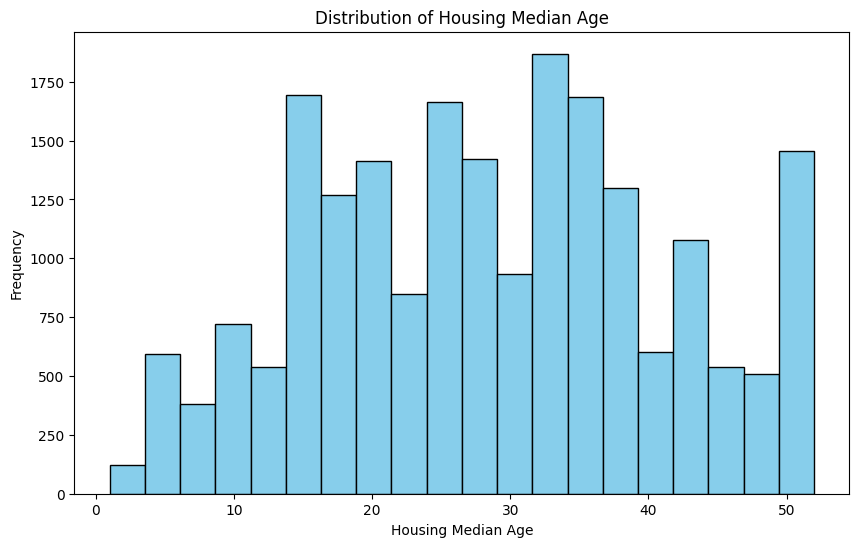

In [ ]:
# Distribution of Housing Median Age
plt.figure(figsize=(10, 6))
plt.hist(data['housing_median_age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# The histogram shows the distribution of housing median age. Most of the housing units appear to be around 15 to 30 years old.
# There are relatively fewer very old or very new houses in the dataset.



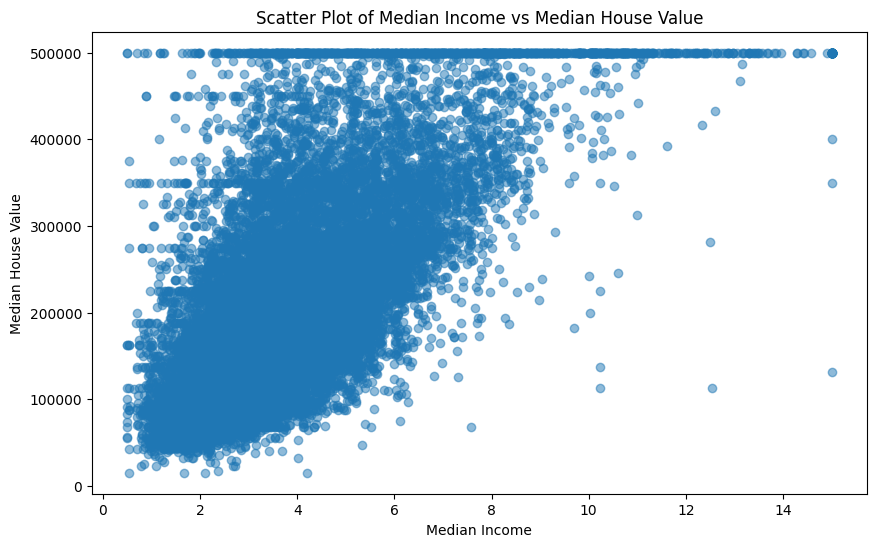

In [ ]:
# Scatter plot of Median Income vs Median House Value
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5)
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Analysis:
# The scatter plot indicates a positive correlation between median income and median house value.
# As median income increases, the median house value tends to increase as well. There are also some upper value limits.



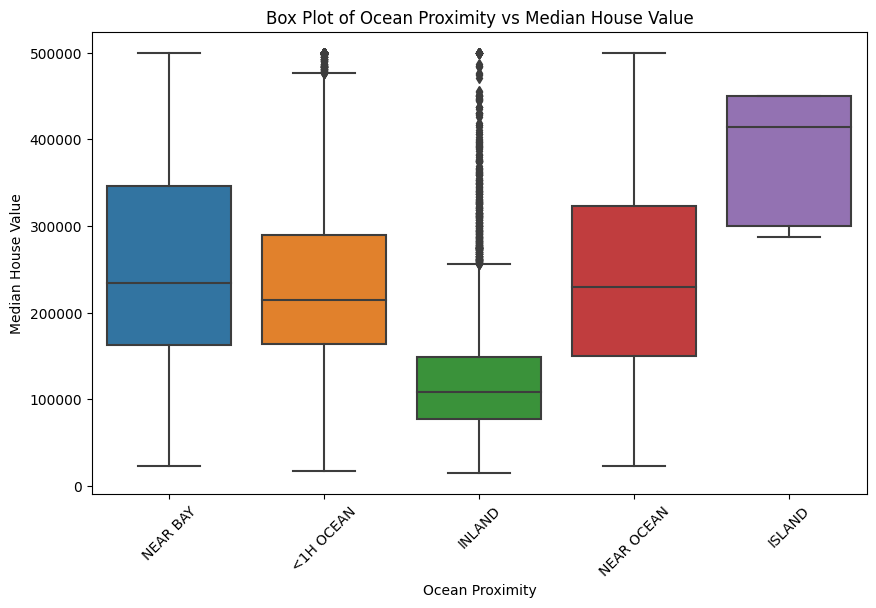

In [ ]:
# Box plot of Ocean Proximity vs Median House Value
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Box Plot of Ocean Proximity vs Median House Value')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

# Analysis:
# The box plot displays the distribution of median house values across different categories of ocean proximity.
# Houses near the ocean ('<1H OCEAN' and 'NEAR OCEAN') tend to have higher median values compared to those inland.



<ipython-input-12-a89398c8de6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


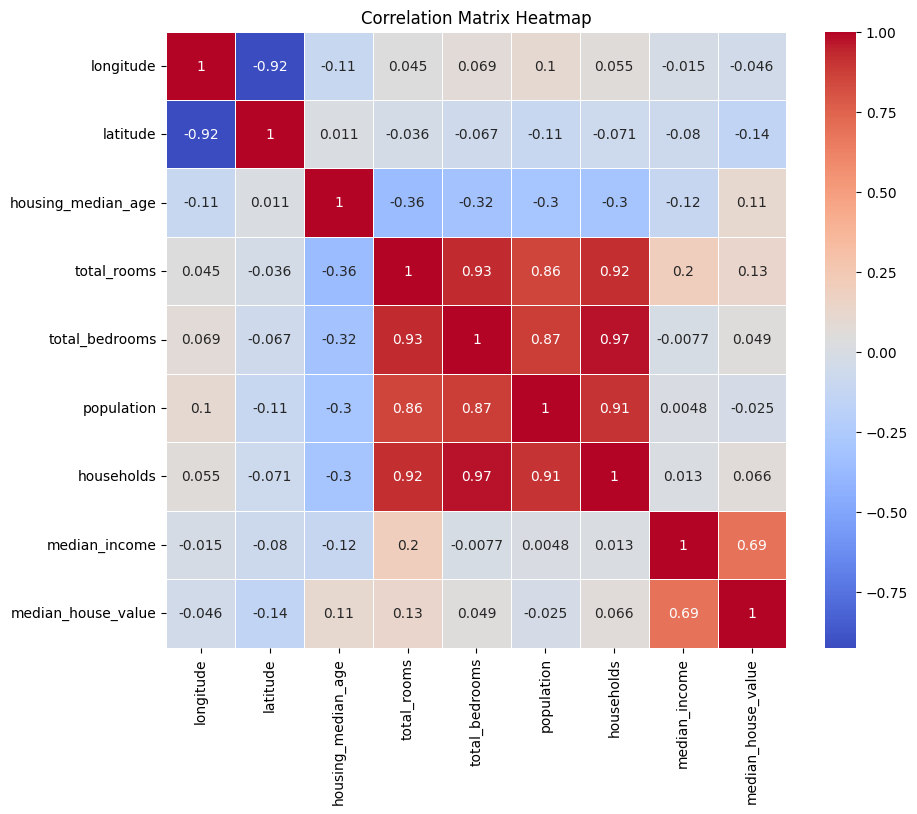

In [ ]:
# Correlation Matrix Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Analysis:
# The heatmap illustrates the correlation coefficients between numerical variables.
# Strong correlations can be observed between total_rooms and total_bedrooms, and between median_income and median_house_value.



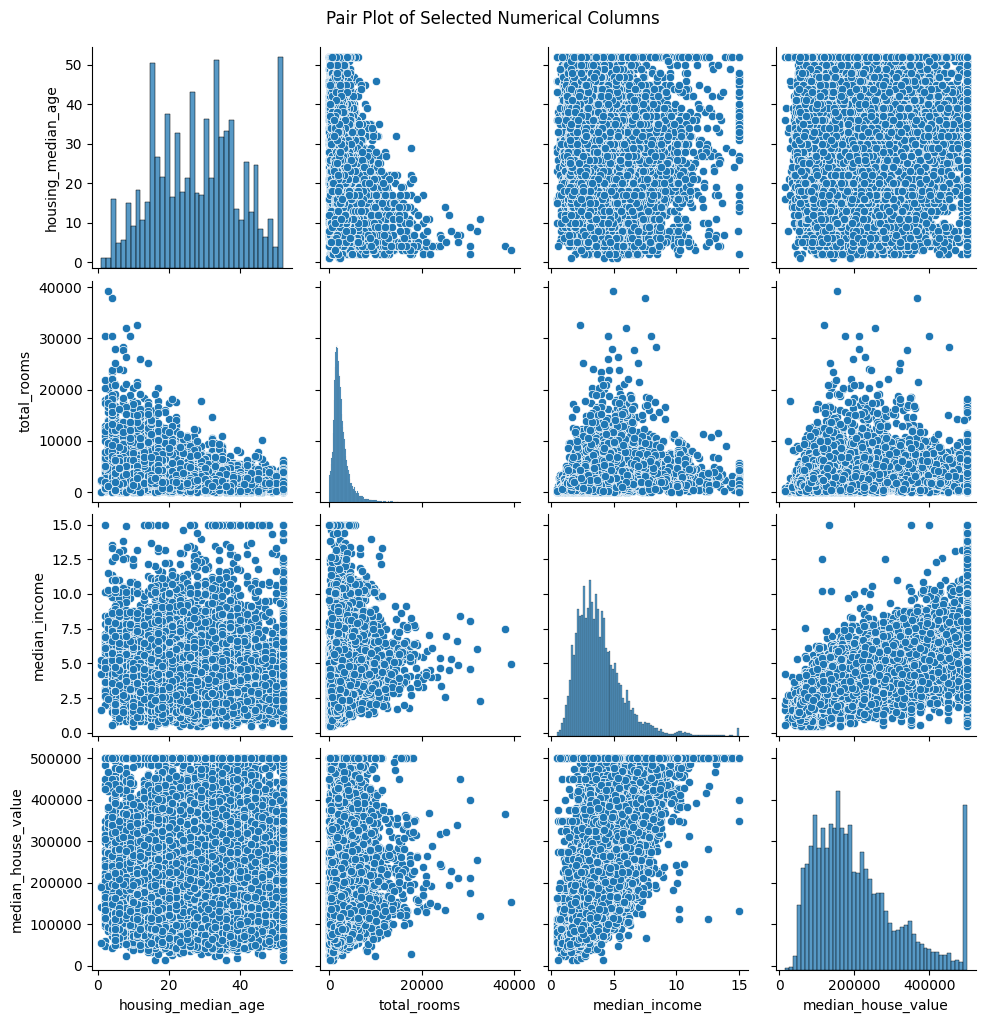

In [ ]:
# Pair Plot of Selected Numerical Columns
sns.pairplot(data[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']])
plt.suptitle('Pair Plot of Selected Numerical Columns', y=1.02)
plt.show()

# Analysis:
# The pair plot showcases scatter plots between selected numerical columns.
# It helps identify potential relationships between different pairs of variables, such as median_income vs median_house_value.

# Conclusion:
# The Exploratory Data Analysis has provided valuable insights into the dataset's features and relationships.
# These insights can guide us in the subsequent steps of the project, including regression and classification modeling.


In [ ]:
#2. VISUALIZATION

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set style for Seaborn visualizations
sns.set(style="whitegrid")



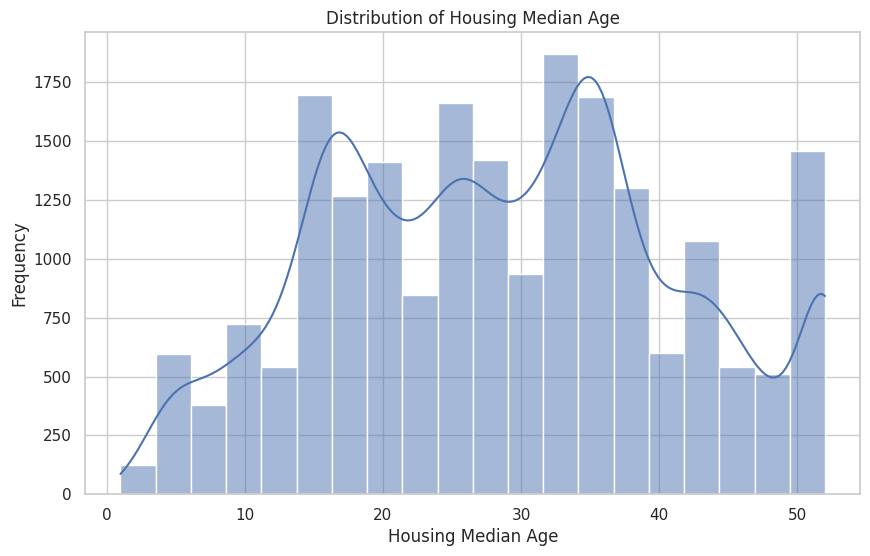

In [ ]:
# Visualizations

# Distribution of Housing Median Age
plt.figure(figsize=(10, 6))
sns.histplot(data['housing_median_age'], bins=20, kde=True)
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# The histogram with a kernel density estimate (KDE) shows the distribution of housing median age.
# It gives a visual representation of the density and spread of the values. Most houses are around 15-30 years old.



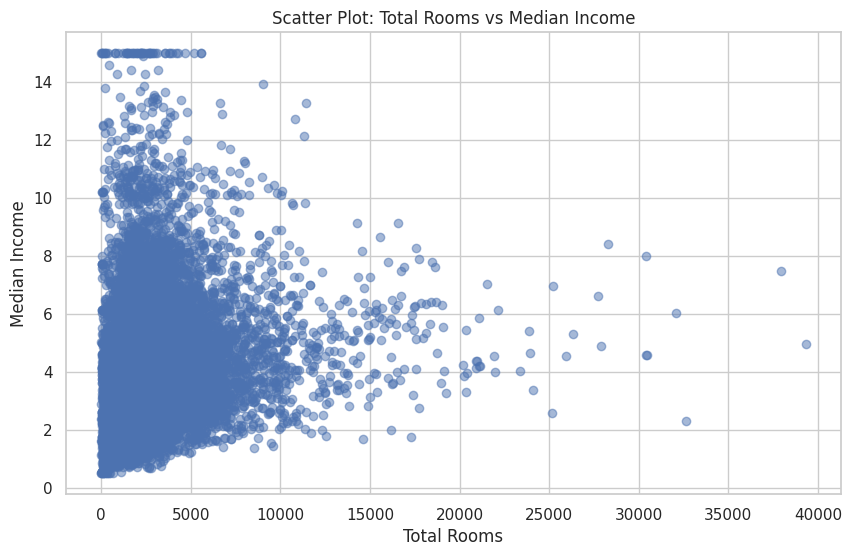

In [ ]:
# Scatter plot: Relationship between 'total_rooms' and 'median_income'
plt.figure(figsize=(10, 6))
plt.scatter(data['total_rooms'], data['median_income'], alpha=0.5)
plt.title('Scatter Plot: Total Rooms vs Median Income')
plt.xlabel('Total Rooms')
plt.ylabel('Median Income')
plt.grid(True)
plt.show()

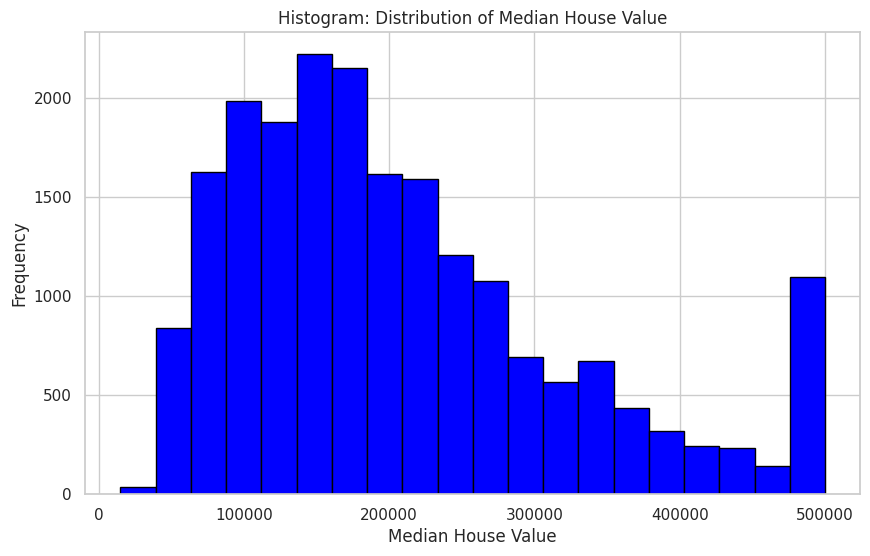

In [ ]:
# Histogram: Distribution of 'median_house_value'
plt.figure(figsize=(10, 6))
plt.hist(data['median_house_value'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram: Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    width=800,  # Width of map
    height=800,  # Height of map
    color="median_house_value",
    hover_data=["median_house_value"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

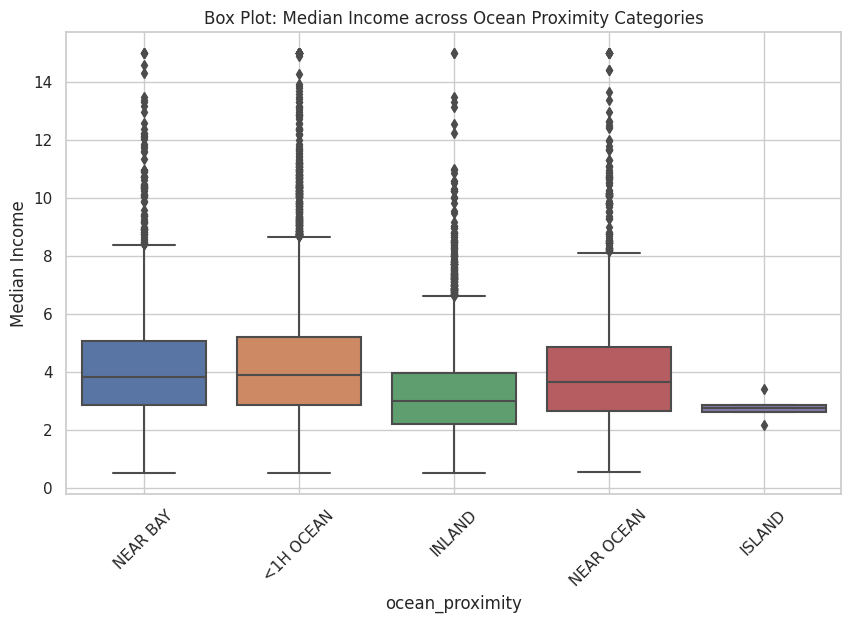

In [ ]:
# Box plot: 'median_income' across different 'ocean_proximity' categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=data)
plt.title('Box Plot: Median Income across Ocean Proximity Categories')
plt.xticks(rotation=45)
plt.ylabel('Median Income')
plt.grid(True)
plt.show()

<ipython-input-24-aea0249ac703>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


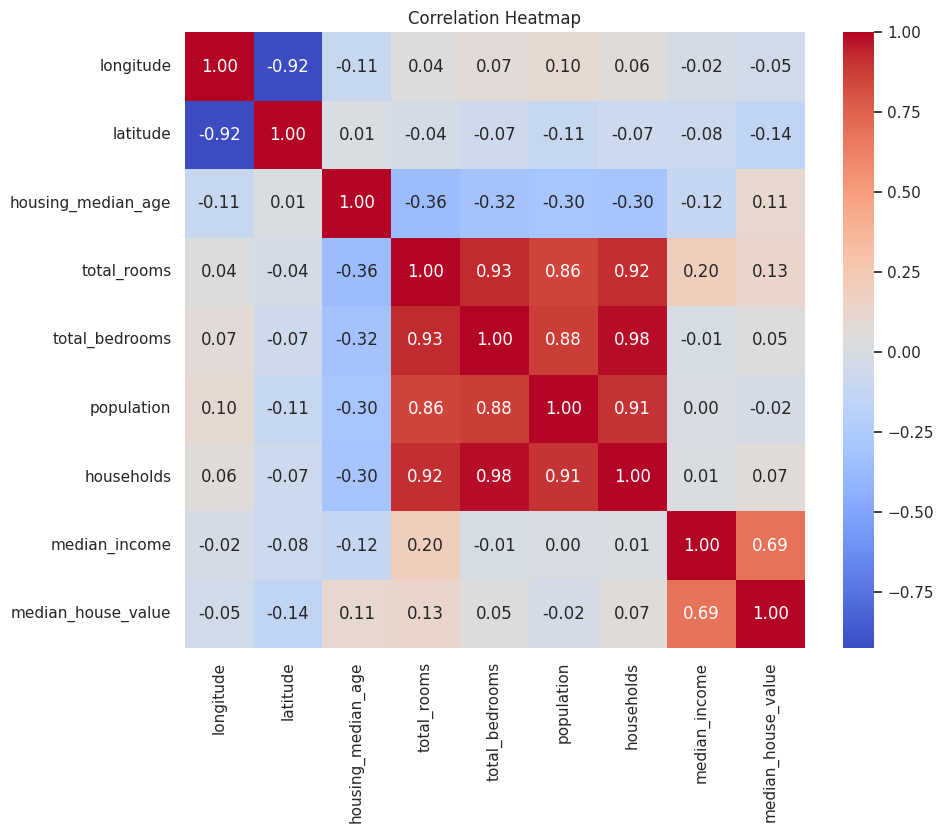

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

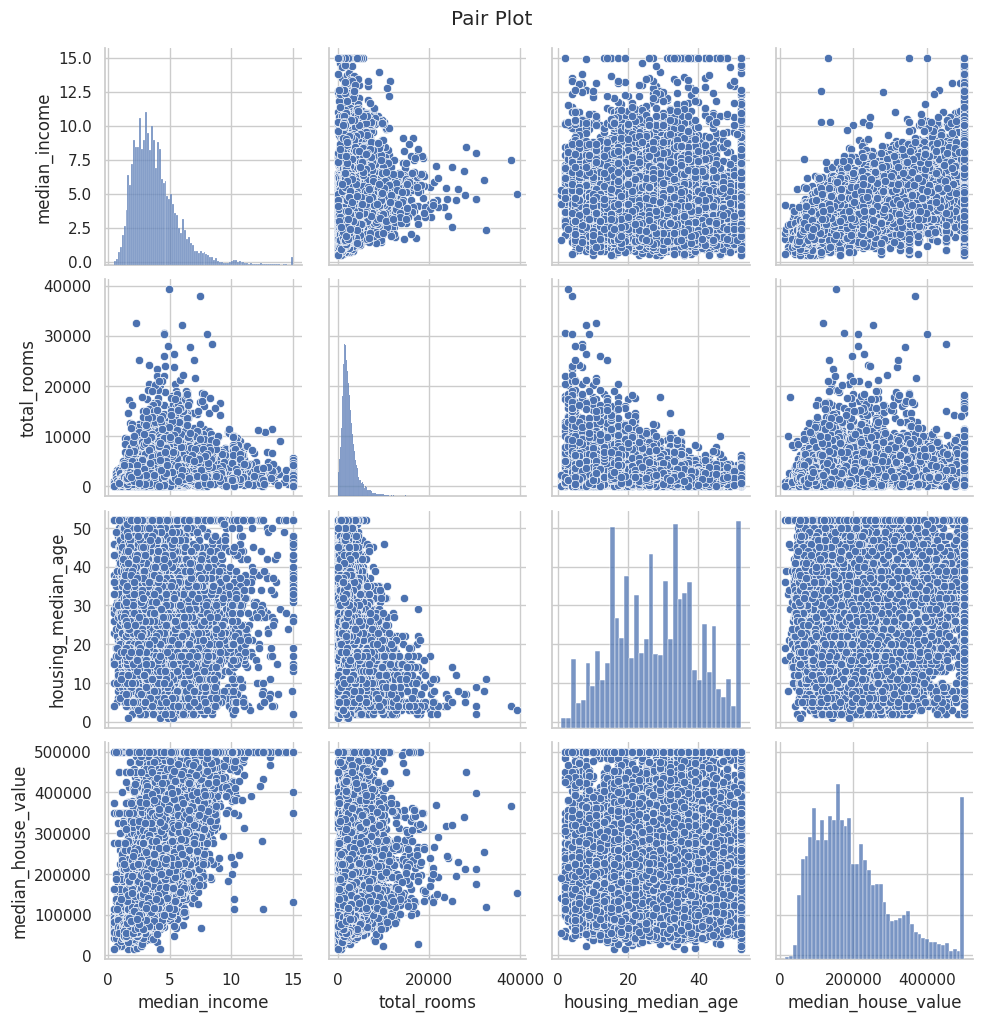

In [ ]:

# Pair plot: Scatter plot matrix for selected columns
sns.pairplot(data[['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [ ]:
#3. REGRESSION MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Data Preprocessing

# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Split the data into features (X) and target (y)
X = data[['median_income', 'housing_median_age', 'total_rooms', 'population']]
y = data['median_house_value']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build and Train the Regression Model

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 6602599478.654306
R-squared Score: 0.5171837519405796


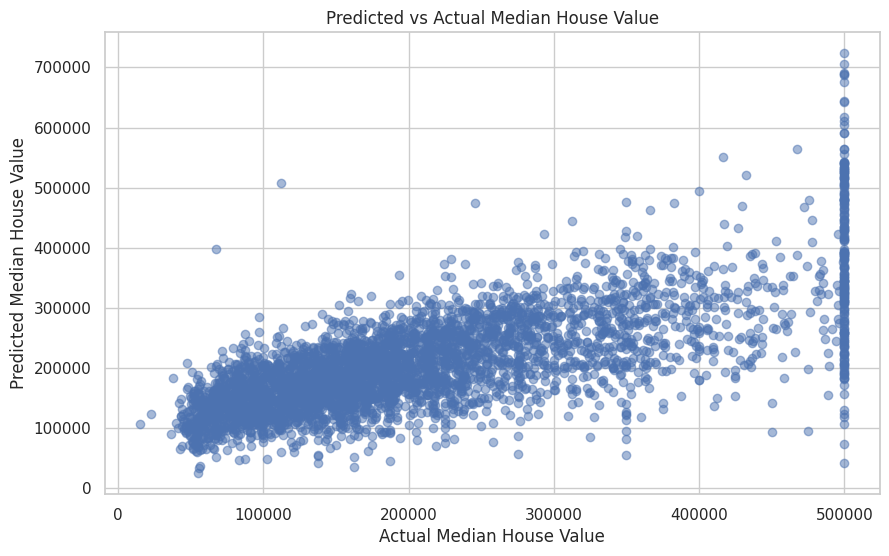

In [ ]:
# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.grid(True)
plt.show()

In [ ]:
# Analysis and Insights

# Model Performance
# The mean squared error and R-squared score provide a measure of how well the regression model fits the data.
# Lower mean squared error and higher R-squared score indicate better model performance.

# Predicted vs. Actual Plot
# The scatter plot of predicted vs. actual values can help visualize how well the model predictions align with the actual data.
# A strong linear alignment would suggest a good model fit.

# Remember that this is a basic linear regression model. Depending on your project's requirements, you can explore more advanced regression techniques and feature engineering.

In [ ]:
# 4. CLASSIFICATION MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Preprocessing

# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build and Train the Classification Model

In [ ]:
# Initialize the random forest classifier
model = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Model Evaluation

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9740641057010032
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1803
           1       0.99      0.98      0.99      1340
           2       0.00      0.00      0.00         2
           3       0.97      0.99      0.98       428
           4       0.95      0.91      0.93       514

    accuracy                           0.97      4087
   macro avg       0.78      0.77      0.77      4087
weighted avg       0.97      0.97      0.97      4087

Confusion Matrix:
 [[1772    9    0    4   18]
 [  23 1315    0    2    0]
 [   0    0    0    0    2]
 [   0    0    0  424    4]
 [  35    1    0    8  470]]


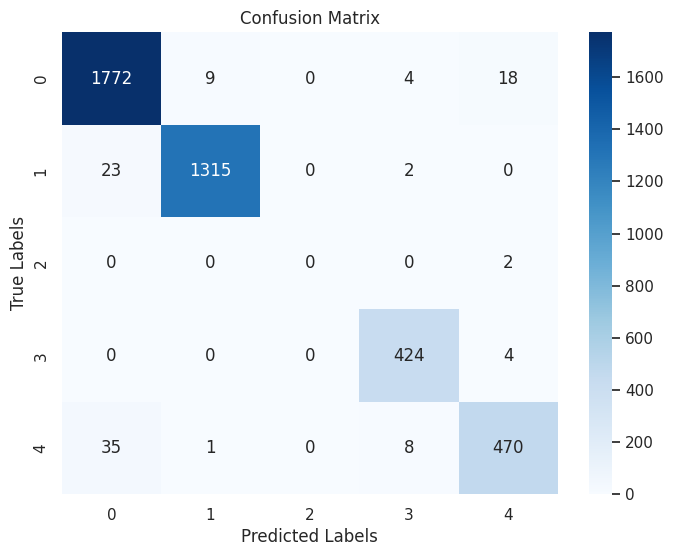

In [ ]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Analysis and Insights

# Model Performance
# The accuracy score provides an overall measure of how well the classification model predicts the 'ocean_proximity' classes.

# Classification Report
# The classification report includes metrics such as precision, recall, and F1-score for each class. These metrics provide insights into the model's performance on individual classes.

# Confusion Matrix
# The confusion matrix visually shows the number of correct and incorrect predictions for each class.

# This classification model uses a random forest algorithm to predict the 'ocean_proximity' class based on other features. You can further refine the model by experimenting with different algorithms, hyperparameters, and feature engineering techniques.


In [ ]:
#5.OVERFITTING AND UNDERFITTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Data Preprocessing

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build and Train Decision Tree Classifier

In [ ]:
# Initialize the decision tree classifiers with different depths
shallow_model = DecisionTreeClassifier(max_depth=3, random_state=42)
deep_model = DecisionTreeClassifier(max_depth=None, random_state=42)


In [ ]:
# Train the shallow model on the training data
shallow_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Train the deep model on the training data
deep_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
shallow_y_pred = shallow_model.predict(X_test)
deep_y_pred = deep_model.predict(X_test)

In [ ]:
# Model Evaluation

In [ ]:
# Calculate accuracy scores for both models
shallow_accuracy = accuracy_score(y_test, shallow_y_pred)
deep_accuracy = accuracy_score(y_test, deep_y_pred)

In [ ]:
print("Shallow Model Accuracy:", shallow_accuracy)
print("Deep Model Accuracy:", deep_accuracy)

Shallow Model Accuracy: 0.7856618546611206
Deep Model Accuracy: 0.9725960362123807


In [ ]:
# Analysis and Insights

# Overfitting and Underfitting
# The shallow model has a limited depth and may underfit the data, while the deep model has no depth limit and may overfit.

# Model Accuracy
# The accuracy scores provide an indication of how well each model performs on the test data.

# It's important to note that this is a simplified example to illustrate overfitting and underfitting. In practice, you would explore multiple model complexities and evaluate them using techniques like cross-validation.


In [ ]:
# 6. MISSING VALUE PIPELINE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Data Preprocessing

# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Missing Value Pipeline


In [ ]:
# Initialize the imputer for missing numerical values
numerical_imputer = SimpleImputer(strategy='mean')

In [ ]:
# Initialize the imputer for missing categorical values
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Initialize the random forest classifier
classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('numerical_imputer', numerical_imputer),
    ('categorical_imputer', categorical_imputer),
    ('classifier', classifier)
])


In [ ]:
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('numerical_imputer', SimpleImputer()),
                ('categorical_imputer',
                 SimpleImputer(strategy='most_frequent')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Model Evaluation

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9740641057010032


In [ ]:
# Analysis and Insights

# Missing Value Pipeline
# The missing value pipeline handles missing data by using simple imputers for both numerical and categorical features.

# Model Performance
# The accuracy score provides an indication of how well the model performs on the test data after handling missing values.

# By using a missing value pipeline, you can streamline the process of handling missing data and training a model, resulting in more efficient and organized workflows.


In [ ]:
#7. CURSE OF DIMENSIONALITY

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Data Preprocessing

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
# Apply Principal Component Analysis (PCA)

In [ ]:
# Initialize PCA with reduced dimensionality
pca = PCA(n_components=2)


In [ ]:
# Apply PCA to the scaled training data
X_train_pca = pca.fit_transform(X_train)

In [ ]:
# Analysis and Insights

# Curse of Dimensionality
# The curse of dimensionality refers to the challenges that arise when working with high-dimensional data.
# In high-dimensional spaces, the data becomes more sparse, which can lead to problems such as increased computational complexity, overfitting, and difficulty in visualization.

# Applying PCA
# To illustrate the impact of dimensionality reduction, we use Principal Component Analysis (PCA) to reduce the dimensionality of the data to 2 principal components.
# This allows us to visualize the data in a 2D space and observe the distribution of data points.


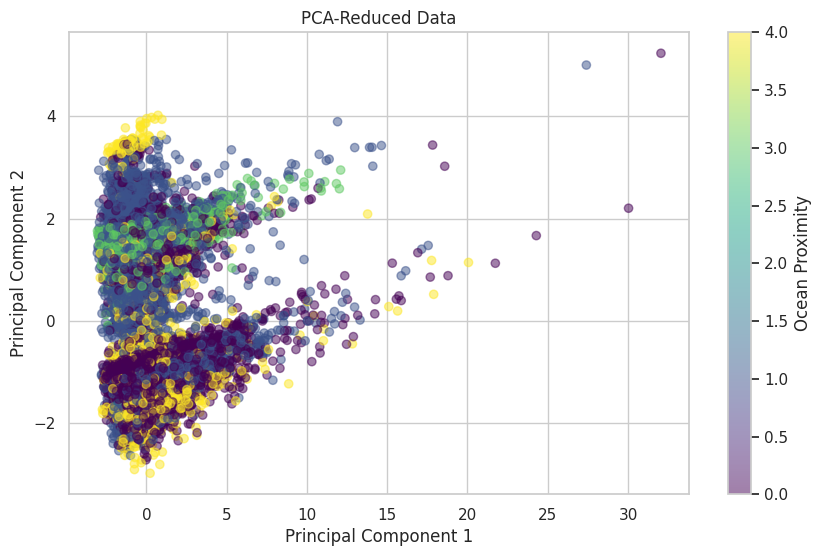

In [ ]:
# Visualization: PCA-Reduced Data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Ocean Proximity')
plt.grid(True)
plt.show()

In [ ]:
# Analysis of Visualization
# The PCA-reduced data plot demonstrates how dimensionality reduction can help visualize high-dimensional data in a lower-dimensional space.
# Data points from different classes (ocean proximity categories) can be seen in a 2D scatter plot.

In [ ]:
#8. RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Data Preprocessing


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)


In [ ]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']


In [ ]:
# Build and Train Random Forest Classifier

In [ ]:
# Initialize the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)



In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Model Evaluation


In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9740641057010032
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1803
           1       0.99      0.98      0.99      1340
           2       0.00      0.00      0.00         2
           3       0.97      0.99      0.98       428
           4       0.95      0.91      0.93       514

    accuracy                           0.97      4087
   macro avg       0.78      0.77      0.77      4087
weighted avg       0.97      0.97      0.97      4087

Confusion Matrix:
 [[1772    9    0    4   18]
 [  23 1315    0    2    0]
 [   0    0    0    0    2]
 [   0    0    0  424    4]
 [  35    1    0    8  470]]


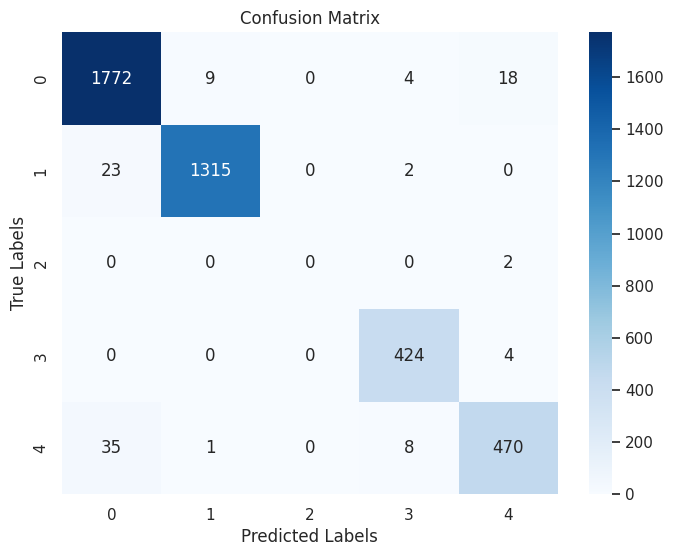

In [ ]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Analysis and Insights

# Random Forest Classifier
# The random forest classifier is an ensemble learning method that builds multiple decision trees and combines their predictions.

# Model Performance
# The accuracy score provides an indication of how well the random forest classifier performs on the test data.

# Classification Report
# The classification report includes metrics such as precision, recall, and F1-score for each class, providing insights into the model's performance on individual classes.

# Confusion Matrix
# The confusion matrix visually shows the number of correct and incorrect predictions for each class.

# The random forest classifier is a versatile algorithm that can handle complex relationships in the data. By analyzing the classification report and confusion matrix, you can gain insights into the model's strengths and areas for improvement.


In [ ]:
# 9. GRADIENT BOOSTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Preprocessing

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)



In [ ]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Build and Train Gradient Boosting Classifier


In [ ]:
# Initialize the gradient boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Model Evaluation

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9718620014680694
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1803
           1       0.99      0.98      0.99      1340
           2       0.00      0.00      0.00         2
           3       0.97      0.99      0.98       428
           4       0.94      0.91      0.93       514

    accuracy                           0.97      4087
   macro avg       0.77      0.77      0.77      4087
weighted avg       0.97      0.97      0.97      4087

Confusion Matrix:
 [[1762   15    0    3   23]
 [  22 1317    0    1    0]
 [   0    0    0    0    2]
 [   1    0    0  424    3]
 [  37    1    0    7  469]]


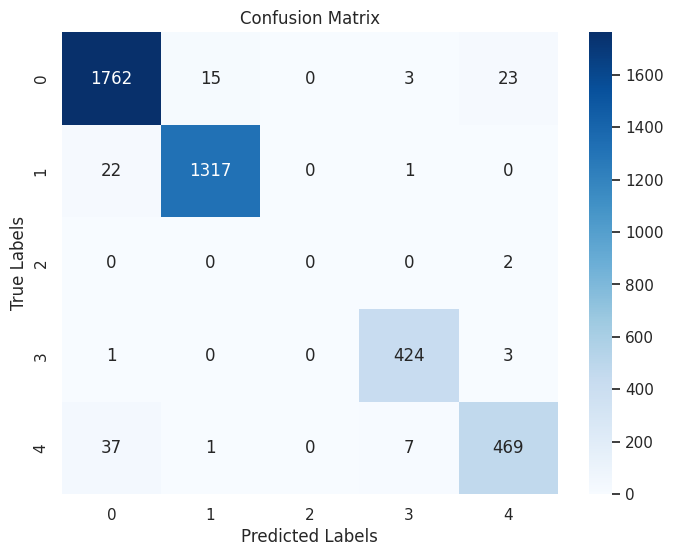

In [ ]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Analysis and Insights

# Gradient Boosting Classifier
# The gradient boosting classifier is an ensemble learning method that combines multiple weak learners to create a strong predictive model.

# Model Performance
# The accuracy score provides an indication of how well the gradient boosting classifier performs on the test data.

# Classification Report
# The classification report includes metrics such as precision, recall, and F1-score for each class, providing insights into the model's performance on individual classes.

# Confusion Matrix
# The confusion matrix visually shows the number of correct and incorrect predictions for each class.

# The gradient boosting classifier is powerful and often yields strong performance. By analyzing the classification report and confusion matrix, you can gain insights into the model's strengths and areas for improvement.


In [ ]:
#10. FEATURES ENGINEERING

In [ ]:
# Create a feature for rooms per person
data['rooms_per_person'] = data['total_rooms'] / data['population']